In [2]:
import os
import pandas as pd
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

✔ Dataset chargé !
   fire  longitude  latitude
0     1    5.53337  35.70751
1     1    6.46961  32.13579
2     1    6.97630  32.35563
3     1    9.39581  28.19791
4     1    9.49323  28.12826

Forme : (3257623, 3)

=== Statistiques Fire / No Fire ===
fire
0    3243407
1      14216
Name: count, dtype: int64

(%) :
fire
0    99.56
1     0.44
Name: count, dtype: float64


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


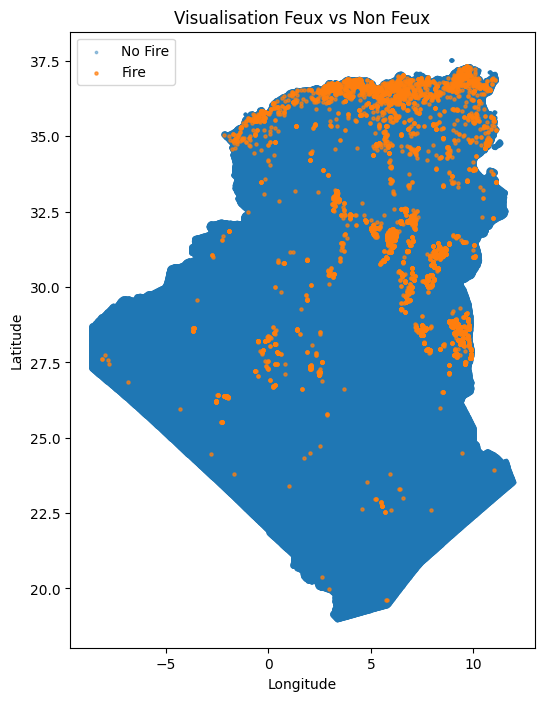

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1) Charger le dataset ===
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final1.csv"
df = pd.read_csv(path)

print("✔ Dataset chargé !")
print(df.head())
print("\nForme :", df.shape)


# === 2) Statistiques Fire / No Fire ===
counts = df["fire"].value_counts()
percent = counts / counts.sum() * 100

print("\n=== Statistiques Fire / No Fire ===")
print(counts)
print("\n(%) :")
print(percent.round(2))


# === 3) Visualisation simple ===
plt.figure(figsize=(6, 8))

plt.scatter(
    df[df["fire"] == 0]["longitude"],
    df[df["fire"] == 0]["latitude"],
    s=3, label="No Fire", alpha=0.4
)

plt.scatter(
    df[df["fire"] == 1]["longitude"],
    df[df["fire"] == 1]["latitude"],
    s=5, label="Fire", alpha=0.7
)

plt.title("Visualisation Feux vs Non Feux")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [1]:
import pandas as pd

input_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final1.csv"
output_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final_north1.csv"

# Lire par morceaux
chunksize = 200000   # 200k lignes par chunk

df_iter = pd.read_csv(input_path, chunksize=chunksize)

# Créer un nouveau fichier vide
first = True

for chunk in df_iter:
    # Garder seulement le nord
    chunk = chunk[chunk["latitude"] >= 28]

    # Sauvegarder ajoute en mode append
    chunk.to_csv(output_path, mode='a', index=False, header=first)
    first = False

print("✔ Nouveau dataset sauvegardé en chunks.")
print(" Fichier :", output_path)


✔ Nouveau dataset sauvegardé en chunks.
 Fichier : C:\Users\DELL\Desktop\project_fire\data\processed\fire_final_north1.csv


In [2]:
import pandas as pd

# Charger la version nord
file_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final_north1.csv"
fire_north = pd.read_csv(file_path)

# Pourcentage
count_fire = (fire_north['fire'] == 1).sum()
count_nofire = (fire_north['fire'] == 0).sum()
total = len(fire_north)

pct_fire = 100 * count_fire / total
pct_nofire = 100 * count_nofire / total

print(" Fire :", count_fire, f"({pct_fire:.2f} %)")
print("❄ No Fire :", count_nofire, f"({pct_nofire:.2f} %)")
print("Total :", total)


 Fire : 12529 (0.70 %)
❄ No Fire : 1785079 (99.30 %)
Total : 1797608


✔ Dataset chargé !
   fire  longitude  latitude
0     1    5.53337  35.70751
1     1    6.46961  32.13579
2     1    6.97630  32.35563
3     1    9.39581  28.19791
4     1    9.49323  28.12826

Forme : (1797608, 3)

=== Statistiques Fire / No Fire ===
fire
0    1785079
1      12529
Name: count, dtype: int64

(%) :
fire
0    99.3
1     0.7
Name: count, dtype: float64


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


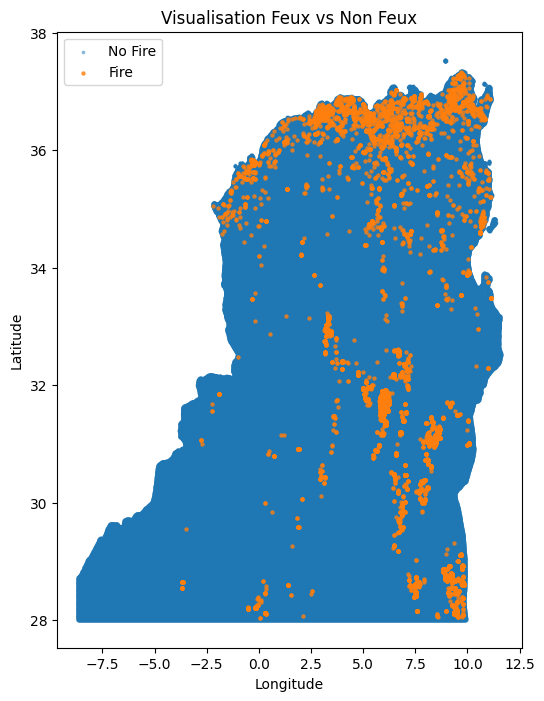

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1) Charger le dataset ===
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final_north1.csv"
df = pd.read_csv(path)

print("✔ Dataset chargé !")
print(df.head())
print("\nForme :", df.shape)


# === 2) Statistiques Fire / No Fire ===
counts = df["fire"].value_counts()
percent = counts / counts.sum() * 100

print("\n=== Statistiques Fire / No Fire ===")
print(counts)
print("\n(%) :")
print(percent.round(2))


# === 3) Visualisation simple ===
plt.figure(figsize=(6, 8))

plt.scatter(
    df[df["fire"] == 0]["longitude"],
    df[df["fire"] == 0]["latitude"],
    s=3, label="No Fire", alpha=0.4
)

plt.scatter(
    df[df["fire"] == 1]["longitude"],
    df[df["fire"] == 1]["latitude"],
    s=5, label="Fire", alpha=0.7
)

plt.title("Visualisation Feux vs Non Feux")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [5]:
import geopandas as gpd

fusion_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion.shp"
lc_fusion = gpd.read_file(fusion_path)

print(" Dataset landcover fusioné chargé !")
print("Taille :", lc_fusion.shape)
print("CRS :", lc_fusion.crs)
print("Colonnes :", list(lc_fusion.columns))



 Dataset landcover fusioné chargé !
Taille : (438513, 7)
CRS : EPSG:4326
Colonnes : ['ID', 'GRIDCODE', 'AREA', 'LCCCODE', 'AREA_M2', 'LCCCode_1', 'geometry']


In [15]:
import geopandas as gpd

# Charger le shapefile fusionné
fusion_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion.shp"
lc_fusion = gpd.read_file(fusion_path)

# Garder uniquement les colonnes 'GRIDCODE' et 'geometry'
lc_fusion_clean = lc_fusion[['GRIDCODE', 'geometry']]

print("Colonnes après nettoyage :", list(lc_fusion_clean.columns))
print("Taille :", lc_fusion_clean.shape)

# Sauvegarder le shapefile nettoyé
output_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion_clean.shp"
lc_fusion_clean.to_file(output_path)

print(f" Shapefile nettoyé enregistré sous : {output_path}")


Colonnes après nettoyage : ['GRIDCODE', 'geometry']
Taille : (438513, 2)
 Shapefile nettoyé enregistré sous : C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion_clean.shp


In [16]:
import geopandas as gpd
import pandas as pd

# === 1. Charger Fire ===
fire = pd.read_csv(r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final_north1.csv")

# Conversion en GeoDataFrame
fire_gdf = gpd.GeoDataFrame(
    fire,
    geometry=gpd.points_from_xy(fire.longitude, fire.latitude),
    crs="EPSG:4326"
)

# === 2. Charger LandCover ===
landcover = gpd.read_file(r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion_clean.shp")
landcover = landcover.to_crs("EPSG:4326")

# === 3. Spatial Join ===
fire_lc = gpd.sjoin(fire_gdf, landcover, how="left", predicate="within")

# === 4. Sauvegarde ===
path_lc = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.csv"
fire_lc.drop(columns="geometry").to_csv(path_lc, index=False)

print("✔ STEP 1 terminé →", path_lc)


✔ STEP 1 terminé → C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.csv


In [17]:
import pandas as pd

# Lire seulement les 100 premières lignes
fire_lc = pd.read_csv(
    r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.csv",
    nrows=100
)

print(fire_lc.head())


   fire  longitude  latitude  index_right  GRIDCODE
0     1    5.53337  35.70751      54057.0     134.0
1     1    6.46961  32.13579     117243.0     202.0
2     1    6.97630  32.35563     117243.0     202.0
3     1    9.39581  28.19791     162073.0     201.0
4     1    9.49323  28.12826     162073.0     201.0


In [18]:
import geopandas as gpd
import pandas as pd

# ===  Charger le dataset Fire ===
fire_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_final_north1.csv"
fire = pd.read_csv(fire_path)

# Conversion en GeoDataFrame
fire_gdf = gpd.GeoDataFrame(
    fire,
    geometry=gpd.points_from_xy(fire.longitude, fire.latitude),
    crs="EPSG:4326"
)

# === Charger le dataset LandCover (clean) ===
landcover_path = r"C:\Users\DELL\Desktop\project_fire\data\raw\landcover\Fusion\landcover_fusion_clean.shp"
landcover = gpd.read_file(landcover_path).to_crs(fire_gdf.crs)

# ===  Spatial join (associer chaque point Fire au polygone LandCover) ===
fire_lc = gpd.sjoin(
    fire_gdf[['fire', 'geometry']],  # on garde seulement 'fire' + geometry
    landcover[['GRIDCODE', 'geometry']],
    how="left",
    predicate="within"
)

# === Supprimer index_right (créé automatiquement par sjoin) ===
fire_lc = fire_lc.drop(columns=['index_right'])

# ===  Ajouter longitude et latitude pour CSV ===
fire_lc['longitude'] = fire_lc.geometry.x
fire_lc['latitude'] = fire_lc.geometry.y

# ===  Sauvegarder le CSV et Shapefile ===
output_csv = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.csv"
fire_lc.to_csv(output_csv, index=False)

output_shp = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.shp"
fire_lc.to_file(output_shp)

print(f" CSV sauvegardé : {output_csv}")
print(f" Shapefile sauvegardé : {output_shp}")


 CSV sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.csv
 Shapefile sauvegardé : C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.shp


In [19]:
import pandas as pd

# Lire seulement les 100 premières lignes
fire_lc = pd.read_csv(
    r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.csv",
    nrows=100
)

print(fire_lc.head())


   fire                                     geometry  GRIDCODE  longitude  \
0     1  POINT (5.533369999999999 35.70750999999999)     134.0    5.53337   
1     1           POINT (6.469609999999999 32.13579)     202.0    6.46961   
2     1  POINT (6.976299999999999 32.35562999999999)     202.0    6.97630   
3     1                     POINT (9.39581 28.19791)     201.0    9.39581   
4     1                     POINT (9.49323 28.12826)     201.0    9.49323   

   latitude  
0  35.70751  
1  32.13579  
2  32.35563  
3  28.19791  
4  28.12826  


In [21]:
pip install rasterio geopandas pandas


In [23]:
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio.sample import sample_gen

# ===  Charger fire_landcover.csv ===
fire_lc = pd.read_csv(r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover.csv")
fire_gdf = gpd.GeoDataFrame(
    fire_lc,
    geometry=gpd.points_from_xy(fire_lc.longitude, fire_lc.latitude),
    crs="EPSG:4326"
)

# ===  Charger le raster d'élévation ===
raster_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\elevation_maghreb.tif"
raster = rasterio.open(raster_path)

# Reprojeter Fire dans le CRS du raster si nécessaire
if fire_gdf.crs != raster.crs:
    fire_gdf = fire_gdf.to_crs(raster.crs)

# ===  Extraire les valeurs d'élévation aux points Fire ===
coords = [(x,y) for x, y in zip(fire_gdf.geometry.x, fire_gdf.geometry.y)]
fire_gdf['elevation'] = [val[0] for val in raster.sample(coords)]

# ===  Ajouter longitude/latitude pour CSV ===
fire_gdf['longitude'] = fire_gdf.geometry.x
fire_gdf['latitude'] = fire_gdf.geometry.y

# ===  Sauvegarder le CSV final ===
output_csv = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation.csv"
fire_gdf.to_csv(output_csv, index=False)

print(f" Fusion Fire + LandCover + Elevation (raster) sauvegardée : {output_csv}")


 Fusion Fire + LandCover + Elevation (raster) sauvegardée : C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation.csv


In [24]:
import pandas as pd

# Lire seulement les 100 premières lignes
fire_lc = pd.read_csv(
    r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation.csv",
    nrows=100
)

print(fire_lc.head())


   fire                                     geometry  GRIDCODE  longitude  \
0     1  POINT (5.533369999999999 35.70750999999999)     134.0    5.53337   
1     1           POINT (6.469609999999999 32.13579)     202.0    6.46961   
2     1  POINT (6.976299999999999 32.35562999999999)     202.0    6.97630   
3     1                     POINT (9.39581 28.19791)     201.0    9.39581   
4     1                     POINT (9.49323 28.12826)     201.0    9.49323   

   latitude  elevation  
0  35.70751       1898  
1  32.13579        137  
2  32.35563        125  
3  28.19791        616  
4  28.12826        589  


In [28]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import rasterio

# Charger le CSV existant
fire_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation.csv"
fire_df = pd.read_csv(fire_path)

# Convertir en GeoDataFrame
fire_gdf = gpd.GeoDataFrame(
    fire_df,
    geometry=gpd.points_from_xy(fire_df.longitude, fire_df.latitude),
    crs="EPSG:4326"
)


In [29]:
def extract_raster_values(raster_path, points_gdf):
    """Retourne une liste de valeurs extraites du raster pour chaque point."""
    with rasterio.open(raster_path) as raster:
        # Reprojeter si nécessaire
        if points_gdf.crs != raster.crs:
            points_gdf = points_gdf.to_crs(raster.crs)
        
        coords = [(x, y) for x, y in zip(points_gdf.geometry.x, points_gdf.geometry.y)]
        values = [val[0] for val in raster.sample(coords)]
    return values


In [30]:
import os

climate_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed\climate_seasonal"

# Listes des fichiers saisonniers
prec_files = ["prec_DJF.tif","prec_MAM.tif","prec_JJA.tif","prec_SON.tif"]
tmax_files = ["tmax_DJF.tif","tmax_MAM.tif","tmax_JJA.tif","tmax_SON.tif"]
tmin_files = ["tmin_DJF.tif","tmin_MAM.tif","tmin_JJA.tif","tmin_SON.tif"]

# Extraire les valeurs
for f in prec_files:
    raster_path = os.path.join(climate_dir, f)
    season = f.split("_")[1].split(".")[0]  # DJF, MAM, ...
    fire_gdf[f"prec_{season}"] = extract_raster_values(raster_path, fire_gdf)

for f in tmax_files:
    raster_path = os.path.join(climate_dir, f)
    season = f.split("_")[1].split(".")[0]
    fire_gdf[f"tmax_{season}"] = extract_raster_values(raster_path, fire_gdf)

for f in tmin_files:
    raster_path = os.path.join(climate_dir, f)
    season = f.split("_")[1].split(".")[0]
    fire_gdf[f"tmin_{season}"] = extract_raster_values(raster_path, fire_gdf)


In [31]:
output_csv = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation_climate.csv"
fire_gdf.to_csv(output_csv, index=False)

print(f" Fusion Fire + LandCover + Elevation + Climate sauvegardée : {output_csv}")


💾 Fusion Fire + LandCover + Elevation + Climate sauvegardée : C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation_climate.csv


In [33]:
import pandas as pd

# chemin du fichier
csv_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation_climate.csv"




In [35]:
output = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_clean.csv"

In [36]:
import pandas as pd

# Charger ton fichier
df = pd.read_csv(r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_clean.csv")

# Afficher le total de valeurs manquantes par colonne
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# Afficher le pourcentage de valeurs manquantes
print("\nPourcentage de valeurs manquantes :")
print((df.isnull().mean() * 100).round(2))


Valeurs manquantes par colonne :
HWSD2_SMU_ID     0
COARSE           0
SAND             0
SILT             0
CLAY             0
TEXTURE_USDA     0
TEXTURE_SOTER    0
BULK             0
REF_BULK         0
ORG_CARBON       0
PH_WATER         0
TOTAL_N          0
CN_RATIO         0
CEC_SOIL         0
CEC_CLAY         0
CEC_EFF          0
TEB              0
BSAT             0
ALUM_SAT         0
ESP              0
TCARBON_EQ       0
GYPSUM           0
ELEC_COND        0
dtype: int64

Pourcentage de valeurs manquantes :
HWSD2_SMU_ID     0.0
COARSE           0.0
SAND             0.0
SILT             0.0
CLAY             0.0
TEXTURE_USDA     0.0
TEXTURE_SOTER    0.0
BULK             0.0
REF_BULK         0.0
ORG_CARBON       0.0
PH_WATER         0.0
TOTAL_N          0.0
CN_RATIO         0.0
CEC_SOIL         0.0
CEC_CLAY         0.0
CEC_EFF          0.0
TEB              0.0
BSAT             0.0
ALUM_SAT         0.0
ESP              0.0
TCARBON_EQ       0.0
GYPSUM           0.0
ELEC_COND        0

In [8]:
import pandas as pd
import rasterio
from rasterio.windows import Window
import numpy as np
import os

# === 1) Charger IDs du sol ===
soil_csv = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_clean.csv"
soil_df = pd.read_csv(soil_csv)
soil_ids = set(soil_df['HWSD2_SMU_ID'].astype(int))

# === 2) Fichiers raster et output ===
raster_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\HWSD2_cropped.tif"
output_csv = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_with_coords.csv"
os.makedirs(os.path.dirname(output_csv), exist_ok=True)

# === 3) Taille du bloc (window) ===
block_size = 1024  # Ajustable selon RAM

with rasterio.open(raster_path) as src, open(output_csv, 'w') as f_out:
    
    f_out.write("HWSD2_SMU_ID,longitude,latitude\n")  # Header CSV

    height, width = src.height, src.width
    transform = src.transform
    nodata = src.nodata

    processed = 0
    
    # Parcours en blocs
    for row in range(0, height, block_size):
        for col in range(0, width, block_size):

            # définir la fenêtre
            win = Window(col_off=col, row_off=row,
                         width=min(block_size, width - col),
                         height=min(block_size, height - row))
            
            # Lire le bloc
            data = src.read(1, window=win)
            
            # Masquer nodata
            if nodata is not None:
                mask = (data != nodata)
            else:
                mask = np.ones_like(data, dtype=bool)

            # Filtrer pixels dont la valeur ∉ soil_ids
            valid = np.vectorize(lambda x: x in soil_ids)(data)
            mask = mask & valid

            # Si aucun pixel valide dans le bloc
            if not np.any(mask):
                continue
            
            # Coordonnées des pixels valides (vectorisé)
            rows, cols = np.where(mask)
            vals = data[rows, cols].astype(int)
            xs, ys = rasterio.transform.xy(
                transform,
                rows + row,  # pos globale
                cols + col,
                offset='center'
            )
            
            # Écriture dans le fichier
            for v, x, y in zip(vals, xs, ys):
                f_out.write(f"{v},{x},{y}\n")

            processed += len(vals)
            print(f"✔ {processed} pixels sauvegardés...")
    
    print(f"\n🎉 Extraction terminée ! Résultat enregistré dans : {output_csv}")


✔ 287686 pixels sauvegardés...
✔ 1234012 pixels sauvegardés...
✔ 1485133 pixels sauvegardés...
✔ 2013100 pixels sauvegardés...
✔ 3030626 pixels sauvegardés...
✔ 3225768 pixels sauvegardés...
✔ 3291515 pixels sauvegardés...

🎉 Extraction terminée ! Résultat enregistré dans : C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_with_coords.csv


In [9]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

fire_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation_climate.csv"
soil_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_with_coords.csv"
output_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv"

# --- Charger soil par chunks et réduire la mémoire ---
soil_chunks = []
chunksize = 100000

for chunk in pd.read_csv(soil_path, chunksize=chunksize,
                         dtype={'longitude': 'float32', 'latitude': 'float32'}):
    soil_chunks.append(chunk)

# Concaténer tous les chunks pour créer KDTree
soil_df = pd.concat(soil_chunks, ignore_index=True)
soil_coords = soil_df[['longitude', 'latitude']].to_numpy()
soil_tree = cKDTree(soil_coords)

# --- Lire fire par chunks et traiter par morceaux ---
chunksize_fire = 100000
chunks_merged = []

for chunk in pd.read_csv(fire_path, chunksize=chunksize_fire,
                         dtype={'longitude': 'float32', 'latitude': 'float32'}):
    fire_coords = chunk[['longitude', 'latitude']].to_numpy()
    distances, indices = soil_tree.query(fire_coords, k=1)

    nearest_soil = soil_df.iloc[indices].reset_index(drop=True)
    nearest_soil = nearest_soil.add_prefix('soil_')

    merged_chunk = pd.concat([chunk.reset_index(drop=True), nearest_soil], axis=1)
    merged_chunk['dist_to_soil'] = distances
    chunks_merged.append(merged_chunk)

# --- Sauvegarder progressivement pour éviter d'avoir tout en mémoire ---
pd.concat(chunks_merged, ignore_index=True).to_csv(output_path, index=False)
print(f"💾 Fusion complète enregistrée : {output_path}")


💾 Fusion complète enregistrée : C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv


In [10]:
import pandas as pd

# === Charger le fichier ===
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv"

df = pd.read_csv(path)

# === Nombre de lignes & colonnes ===
print("✔ Nombre de lignes :", df.shape[0])
print("✔ Nombre de colonnes :", df.shape[1])

# === Liste des colonnes ===
print("\n✔ Colonnes :", list(df.columns))

# === Afficher les 10 premières lignes ===
print("\n✔ Aperçu des 10 premières lignes :")
print(df.head(10))


✔ Nombre de lignes : 1797608
✔ Nombre de colonnes : 22

✔ Colonnes : ['fire', 'geometry', 'GRIDCODE', 'longitude', 'latitude', 'elevation', 'prec_DJF', 'prec_MAM', 'prec_JJA', 'prec_SON', 'tmax_DJF', 'tmax_MAM', 'tmax_JJA', 'tmax_SON', 'tmin_DJF', 'tmin_MAM', 'tmin_JJA', 'tmin_SON', 'soil_HWSD2_SMU_ID', 'soil_longitude', 'soil_latitude', 'dist_to_soil']

✔ Aperçu des 10 premières lignes :
   fire                                      geometry  GRIDCODE  longitude  \
0     1   POINT (5.533369999999999 35.70750999999999)     134.0    5.53337   
1     1            POINT (6.469609999999999 32.13579)     202.0    6.46961   
2     1   POINT (6.976299999999999 32.35562999999999)     202.0    6.97630   
3     1                      POINT (9.39581 28.19791)     201.0    9.39581   
4     1                      POINT (9.49323 28.12826)     201.0    9.49323   
5     1  POINT (7.026930000000001 30.473479999999995)     202.0    7.02693   
6     1             POINT (7.0226 30.474370000000004)     202.

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import os

# === Paths ===
fire_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_landcover_elevation_climate.csv"
soil_coords_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_with_coords.csv"
soil_attr_path  = r"C:\Users\DELL\Desktop\project_fire\data\processed\soil\soil_clean.csv"
output_path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv"

# === Load soil attributes ONLY once (small file) ===
soil_attr = pd.read_csv(soil_attr_path)

# === Remove output if exists ===
if os.path.exists(output_path):
    os.remove(output_path)

header_written = False

# === Read FIRE by chunks ===
for fire_chunk in pd.read_csv(fire_path, chunksize=30000,
                              dtype={'longitude':'float32','latitude':'float32'}):

    fire_coords = fire_chunk[['longitude','latitude']].to_numpy()

    # === Initialize a dataframe to accumulate soil matches for this fire chunk ===
    fire_soil_df = None

    # === Read SOIL COORDS by chunks (huge file) ===
    for soil_chunk in pd.read_csv(soil_coords_path, chunksize=150000,
                                  dtype={'longitude':'float32','latitude':'float32'}):

        # Merge soil attributes (tiny merge)
        soil_chunk = soil_chunk.merge(soil_attr, on="HWSD2_SMU_ID", how="left")

        # KDTree for the SOIL chunk
        soil_coords = soil_chunk[['longitude','latitude']].to_numpy()
        tree = cKDTree(soil_coords)

        # Query nearest neighbors
        distances, indices = tree.query(fire_coords, k=1)

        nearest = soil_chunk.iloc[indices].reset_index(drop=True)
        nearest["soil_distance"] = distances

        # === Keep only the BEST match so far ===
        if fire_soil_df is None:
            fire_soil_df = nearest
        else:
            # Keep the closer point between previous chunks and current chunk
            mask = nearest["soil_distance"] < fire_soil_df["soil_distance"]
            fire_soil_df.loc[mask] = nearest.loc[mask]

    # Prefix soil columns
    fire_soil_df = fire_soil_df.add_prefix("soil_")

    # Final merge: FIRE + matched SOIL
    final = pd.concat([fire_chunk.reset_index(drop=True), fire_soil_df], axis=1)

    # Write immediately
    final.to_csv(output_path, mode='a', index=False, header=not header_written)
    header_written = True

    print("✔ Chunk FIRE fusionné et écrit :", len(final), "lignes")


✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 30000 lignes
✔ Chunk FIRE fusionné et écrit : 3

In [2]:
import pandas as pd

# === Charger le fichier ===
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv"

df = pd.read_csv(path)

# === Nombre de lignes & colonnes ===
print("✔ Nombre de lignes :", df.shape[0])
print("✔ Nombre de colonnes :", df.shape[1])

# === Liste des colonnes ===
print("\n✔ Colonnes :", list(df.columns))

# === Afficher les 10 premières lignes ===
print("\n✔ Aperçu des 10 premières lignes :")
print(df.head(10))


✔ Nombre de lignes : 1797608
✔ Nombre de colonnes : 44

✔ Colonnes : ['fire', 'geometry', 'GRIDCODE', 'longitude', 'latitude', 'elevation', 'prec_DJF', 'prec_MAM', 'prec_JJA', 'prec_SON', 'tmax_DJF', 'tmax_MAM', 'tmax_JJA', 'tmax_SON', 'tmin_DJF', 'tmin_MAM', 'tmin_JJA', 'tmin_SON', 'soil_HWSD2_SMU_ID', 'soil_longitude', 'soil_latitude', 'soil_COARSE', 'soil_SAND', 'soil_SILT', 'soil_CLAY', 'soil_TEXTURE_USDA', 'soil_TEXTURE_SOTER', 'soil_BULK', 'soil_REF_BULK', 'soil_ORG_CARBON', 'soil_PH_WATER', 'soil_TOTAL_N', 'soil_CN_RATIO', 'soil_CEC_SOIL', 'soil_CEC_CLAY', 'soil_CEC_EFF', 'soil_TEB', 'soil_BSAT', 'soil_ALUM_SAT', 'soil_ESP', 'soil_TCARBON_EQ', 'soil_GYPSUM', 'soil_ELEC_COND', 'soil_soil_distance']

✔ Aperçu des 10 premières lignes :
   fire                                      geometry  GRIDCODE  longitude  \
0     1   POINT (5.533369999999999 35.70750999999999)     134.0    5.53337   
1     1            POINT (6.469609999999999 32.13579)     202.0    6.46961   
2     1   POINT 

In [4]:
import pandas as pd

path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv"




In [7]:
import pandas as pd

# Charger le fichier
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv"
df = pd.read_csv(path)

# Affichage propre des 10 premières lignes
df.head(10).style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt')]},
     {'selector': 'td', 'props': [('font-size', '11pt')]}]
)


,fire,geometry,GRIDCODE,longitude,latitude,elevation,prec_DJF,prec_MAM,prec_JJA,prec_SON,tmax_DJF,tmax_MAM,tmax_JJA,tmax_SON,tmin_DJF,tmin_MAM,tmin_JJA,tmin_SON,soil_HWSD2_SMU_ID,soil_longitude,soil_latitude,soil_COARSE,soil_SAND,soil_SILT,soil_CLAY,soil_TEXTURE_USDA,soil_TEXTURE_SOTER,soil_BULK,soil_REF_BULK,soil_ORG_CARBON,soil_PH_WATER,soil_TOTAL_N,soil_CN_RATIO,soil_CEC_SOIL,soil_CEC_CLAY,soil_CEC_EFF,soil_TEB,soil_BSAT,soil_ALUM_SAT,soil_ESP,soil_TCARBON_EQ,soil_GYPSUM,soil_ELEC_COND,soil_soil_distance
0,1,POINT (5.533369999999999 35.70750999999999),134.000000,5.533370,35.707510,1898,115.025000,60.275000,19.675000,106.825000,8.833333,17.166666,29.666666,19.416666,1.250000,6.500000,16.250000,10.000000,1238,5.537500,35.704166,22,51,29,20,9.000000,M,1.370000,1.720000,3.163000,6.700000,1.500000,12.000000,16,35,20.000000,10.000000,64,0,3,0.000000,0.300000,1,0.005315
1,1,POINT (6.469609999999999 32.13579),202.000000,6.469610,32.135790,137,9.475000,16.900002,2.300000,16.850000,19.750000,31.666666,43.666668,32.250000,6.666666,16.916666,28.666666,19.333334,1642,6.470833,32.137500,9,55,30,15,11.000000,M,1.420000,1.620000,0.589000,8.200000,0.780000,9.000000,14,83,37.000000,37.000000,99,0,4,9.300000,3.300000,1,0.002102
2,1,POINT (6.976299999999999 32.35562999999999),202.000000,6.976300,32.355630,125,10.425000,21.075000,2.200000,16.675001,19.666666,31.333334,43.333332,32.000000,6.500000,16.666666,28.333334,19.250000,1645,6.979166,32.354168,15,64,20,16,11.000000,M,1.530000,1.650000,0.644000,7.000000,0.730000,10.000000,12,64,15.000000,15.000000,94,0,2,1.700000,0.100000,1,0.003218
3,1,POINT (9.39581 28.19791),201.000000,9.395810,28.197910,616,8.950000,10.225000,1.000000,4.475000,19.916666,31.500000,41.333332,31.666666,4.083334,15.083333,25.000000,16.666666,1796,9.395833,28.195833,12,57,27,16,11.000000,M,1.430000,1.650000,0.616000,7.800000,0.730000,9.000000,13,74,30.000000,30.000000,100,0,3,8.000000,4.000000,1,0.002077
4,1,POINT (9.49323 28.12826),201.000000,9.493230,28.128260,589,8.200000,10.200000,1.000000,3.800000,20.000000,31.666666,41.333332,31.666666,5.000000,15.666667,25.500000,17.000000,1796,9.495833,28.129168,12,57,27,16,11.000000,M,1.430000,1.650000,0.616000,7.800000,0.730000,9.000000,13,74,30.000000,30.000000,100,0,3,8.000000,4.000000,1,0.002757
5,1,POINT (7.026930000000001 30.473479999999995),202.000000,7.026930,30.473480,207,10.000000,11.900000,0.900000,7.300000,21.333334,33.000000,44.666668,34.000000,6.666666,17.333334,28.666666,19.666666,36,7.029167,30.470833,-4,-4,-4,-4,9.000000,-,-4.000000,1.710000,-4.000000,-4.000000,-4.000000,-4.000000,-4,-4,-4.000000,-4.000000,-4,-4,-4,-4.000000,-4.000000,-4,0.003466
6,1,POINT (7.0226 30.474370000000004),202.000000,7.022600,30.474370,207,10.000000,11.900000,0.900000,7.300000,21.333334,33.000000,44.666668,34.000000,6.666666,17.333334,28.666666,19.666666,36,7.020834,30.470833,-4,-4,-4,-4,9.000000,-,-4.000000,1.710000,-4.000000,-4.000000,-4.000000,-4.000000,-4,-4,-4.000000,-4.000000,-4,-4,-4,-4.000000,-4.000000,-4,0.003953
7,1,POINT (6.785539999999999 31.1876),201.000000,6.785540,31.187600,163,10.424999,16.150002,1.800000,11.425000,21.000000,33.000000,44.666668,34.000000,6.666666,17.333334,29.000000,20.000000,36,6.787500,31.187500,-4,-4,-4,-4,9.000000,-,-4.000000,1.710000,-4.000000,-4.000000,-4.000000,-4.000000,-4,-4,-4.000000,-4.000000,-4,-4,-4,-4.000000,-4.000000,-4,0.001962
8,1,POINT (6.05296 31.35859),201.000000,6.052960,31.358590,156,8.325000,11.000000,1.800000,12.275000,20.666666,32.333332,44.333332,33.000000,6.666666,17.333334,29.000000,19.333334,1315,6.054167,31.362500,12,49,33,18,9.000000,M,1.450000,1.680000,0.697000,8.200000,0.800000,9.000000,14,67,38.000000,38.000000,100,0,2,13.900000,0.200000,1,0.004092
9,1,POINT (6.048889999999999 31.36055),201.000000,6.048890,31.360550,156,8.325000,11.000000,1.800000,12.275000,20.666666,32.333332,44.333332,33.000000,6.666666,17.333334,29.000000,19.333334,1315,6.045833,31.362500,12,49,33,18,9.000000,M,1.450000,1.680000,0.697000,8.200000,0.800

In [8]:
import pandas as pd

# Charger le fichier
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv"
df = pd.read_csv(path)

# Supprimer les colonnes soil_longitude et soil_latitude
df = df.drop(columns=['soil_longitude', 'soil_latitude'])

# Vérifier
print(df.head(10))

# (Optionnel) sauvegarder le fichier modifié
df.to_csv(path, index=False)


   fire                                      geometry  GRIDCODE  longitude  \
0     1   POINT (5.533369999999999 35.70750999999999)     134.0    5.53337   
1     1            POINT (6.469609999999999 32.13579)     202.0    6.46961   
2     1   POINT (6.976299999999999 32.35562999999999)     202.0    6.97630   
3     1                      POINT (9.39581 28.19791)     201.0    9.39581   
4     1                      POINT (9.49323 28.12826)     201.0    9.49323   
5     1  POINT (7.026930000000001 30.473479999999995)     202.0    7.02693   
6     1             POINT (7.0226 30.474370000000004)     202.0    7.02260   
7     1             POINT (6.785539999999999 31.1876)     201.0    6.78554   
8     1                      POINT (6.05296 31.35859)     201.0    6.05296   
9     1            POINT (6.048889999999999 31.36055)     201.0    6.04889   

   latitude  elevation    prec_DJF   prec_MAM  prec_JJA    prec_SON  ...  \
0  35.70751       1898  115.025000  60.275000    19.675  106.8250

In [10]:
import pandas as pd

# Charger le fichier
path = r"C:\Users\DELL\Desktop\project_fire\data\processed\fire_soil_merged.csv"
df = pd.read_csv(path)

# Affichage propre des 10 premières lignes
df.head(10).style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt')]},
     {'selector': 'td', 'props': [('font-size', '11pt')]}]
)


,fire,geometry,GRIDCODE,longitude,latitude,elevation,prec_DJF,prec_MAM,prec_JJA,prec_SON,tmax_DJF,tmax_MAM,tmax_JJA,tmax_SON,tmin_DJF,tmin_MAM,tmin_JJA,tmin_SON,soil_HWSD2_SMU_ID,soil_COARSE,soil_SAND,soil_SILT,soil_CLAY,soil_TEXTURE_USDA,soil_TEXTURE_SOTER,soil_BULK,soil_REF_BULK,soil_ORG_CARBON,soil_PH_WATER,soil_TOTAL_N,soil_CN_RATIO,soil_CEC_SOIL,soil_CEC_CLAY,soil_CEC_EFF,soil_TEB,soil_BSAT,soil_ALUM_SAT,soil_ESP,soil_TCARBON_EQ,soil_GYPSUM,soil_ELEC_COND,soil_soil_distance
0,1,POINT (5.533369999999999 35.70750999999999),134.000000,5.533370,35.707510,1898,115.025000,60.275000,19.675000,106.825000,8.833333,17.166666,29.666666,19.416666,1.250000,6.500000,16.250000,10.000000,1238,22,51,29,20,9.000000,M,1.370000,1.720000,3.163000,6.700000,1.500000,12.000000,16,35,20.000000,10.000000,64,0,3,0.000000,0.300000,1,0.005315
1,1,POINT (6.469609999999999 32.13579),202.000000,6.469610,32.135790,137,9.475000,16.900002,2.300000,16.850000,19.750000,31.666666,43.666668,32.250000,6.666666,16.916666,28.666666,19.333334,1642,9,55,30,15,11.000000,M,1.420000,1.620000,0.589000,8.200000,0.780000,9.000000,14,83,37.000000,37.000000,99,0,4,9.300000,3.300000,1,0.002102
2,1,POINT (6.976299999999999 32.35562999999999),202.000000,6.976300,32.355630,125,10.425000,21.075000,2.200000,16.675001,19.666666,31.333334,43.333332,32.000000,6.500000,16.666666,28.333334,19.250000,1645,15,64,20,16,11.000000,M,1.530000,1.650000,0.644000,7.000000,0.730000,10.000000,12,64,15.000000,15.000000,94,0,2,1.700000,0.100000,1,0.003218
3,1,POINT (9.39581 28.19791),201.000000,9.395810,28.197910,616,8.950000,10.225000,1.000000,4.475000,19.916666,31.500000,41.333332,31.666666,4.083334,15.083333,25.000000,16.666666,1796,12,57,27,16,11.000000,M,1.430000,1.650000,0.616000,7.800000,0.730000,9.000000,13,74,30.000000,30.000000,100,0,3,8.000000,4.000000,1,0.002077
4,1,POINT (9.49323 28.12826),201.000000,9.493230,28.128260,589,8.200000,10.200000,1.000000,3.800000,20.000000,31.666666,41.333332,31.666666,5.000000,15.666667,25.500000,17.000000,1796,12,57,27,16,11.000000,M,1.430000,1.650000,0.616000,7.800000,0.730000,9.000000,13,74,30.000000,30.000000,100,0,3,8.000000,4.000000,1,0.002757
5,1,POINT (7.026930000000001 30.473479999999995),202.000000,7.026930,30.473480,207,10.000000,11.900000,0.900000,7.300000,21.333334,33.000000,44.666668,34.000000,6.666666,17.333334,28.666666,19.666666,36,-4,-4,-4,-4,9.000000,-,-4.000000,1.710000,-4.000000,-4.000000,-4.000000,-4.000000,-4,-4,-4.000000,-4.000000,-4,-4,-4,-4.000000,-4.000000,-4,0.003466
6,1,POINT (7.0226 30.474370000000004),202.000000,7.022600,30.474370,207,10.000000,11.900000,0.900000,7.300000,21.333334,33.000000,44.666668,34.000000,6.666666,17.333334,28.666666,19.666666,36,-4,-4,-4,-4,9.000000,-,-4.000000,1.710000,-4.000000,-4.000000,-4.000000,-4.000000,-4,-4,-4.000000,-4.000000,-4,-4,-4,-4.000000,-4.000000,-4,0.003953
7,1,POINT (6.785539999999999 31.1876),201.000000,6.785540,31.187600,163,10.424999,16.150002,1.800000,11.425000,21.000000,33.000000,44.666668,34.000000,6.666666,17.333334,29.000000,20.000000,36,-4,-4,-4,-4,9.000000,-,-4.000000,1.710000,-4.000000,-4.000000,-4.000000,-4.000000,-4,-4,-4.000000,-4.000000,-4,-4,-4,-4.000000,-4.000000,-4,0.001962
8,1,POINT (6.05296 31.35859),201.000000,6.052960,31.358590,156,8.325000,11.000000,1.800000,12.275000,20.666666,32.333332,44.333332,33.000000,6.666666,17.333334,29.000000,19.333334,1315,12,49,33,18,9.000000,M,1.450000,1.680000,0.697000,8.200000,0.800000,9.000000,14,67,38.000000,38.000000,100,0,2,13.900000,0.200000,1,0.004092
9,1,POINT (6.048889999999999 31.36055),201.000000,6.048890,31.360550,156,8.325000,11.000000,1.800000,12.275000,20.666666,32.333332,44.333332,33.000000,6.666666,17.333334,29.000000,19.333334,1315,12,49,33,18,9.000000,M,1.450000,1.680000,0.697000,8.200000,0.800000,9.000000,14,67,38.000000,38.000000,100,0,2,13.900000,0.200000,1,0.003626


In [1]:
import numpy as np

# Colonnes constantes
nunique = df.nunique()
constant_cols = nunique[nunique <= 1].index.tolist()
df = df.drop(columns=constant_cols)

# Corrélation avec target
if 'fire' in df.columns:
    corr_target = df.corr(numeric_only=True)['fire']
    low_corr_cols = corr_target[abs(corr_target) < 0.02].index.tolist()
    df = df.drop(columns=low_corr_cols)

# Corrélation entre features
corr_matrix = df.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper.columns if any(upper[col] > 0.90)]
df = df.drop(columns=high_corr_cols)

print("Feature engineering terminé, dataset shape :", df.shape)


NameError: name 'df' is not defined